In [2]:
import sqlite3
import pandas as pd

<img src="https://media3.giphy.com/media/UqeH2KKx0U65oETdDR/source.gif" width="300" height="300" />

**How do you import data from a csv file into a pandas dataframe?**

**`df = pd.read_csv('sample_file.csv')`**

So far we've learned how to work with data that we can load from a csv file into pandas. We've also worked with data that lives in a large relational database. But what if we get the data that we want from a database and then want to analyze it using tools that integrate with the Pandas package? We can do that!

<img src="https://th.bing.com/th/id/R.9edf500c38edf7522b9478faf29cb5ab?rik=xOXrm6cWkEeP6Q&riu=http%3a%2f%2f3.bp.blogspot.com%2f-_ZZy4bYmol8%2fUH1ik1fdQII%2fAAAAAAAAYpk%2fCx7N99KeVqM%2fs1600%2f002-funny-animal-gifs-baby-pandas-on-slide.gif&ehk=8ubfZviYci858vTnxvv9fpnof1uuyehHpPi2UixF96o%3d&risl=&pid=ImgRaw&r=0" width="400" height="400" />

# But Why Didn't We Just Do That From the Start??

There are a couple of reasons why working with data in a database client application (like Azure Data Studio) can be better than working with it in Pandas:

* Pandas loads all data into memory before doing any processing on the dataframe. So if the size of the dataset is larger than the memory availabe, you will run into memory errors (or crash your computer 😬)

* During certain processing and transformation steps Pandas may create a copy of the dataframe, further increasing the amount of memory used. 

* Database applications are optimized for querying, JOINs, and memory management.

* A database client provides helpful features like SQL autocompletion, syntax highlighting, helpful error messages, etc. 

# DO's for Database Data in Python

<img src="https://th.bing.com/th/id/R.8e17936f06c399e6173a4637382d6693?rik=OIOAq3ffOXZHwQ&riu=http%3a%2f%2fwww.reactiongifs.us%2fwp-content%2fuploads%2f2013%2f03%2fthumbs_up_matt_leblanc.gif&ehk=iHR1fpLEeDUpZIvxi%2b%2bhmQTmRoQJy1wXdSmoS0atQF4%3d&risl=&pid=ImgRaw&r=0" width="500" height="500" />

* **<span style="color:green">DO</span>** explore the data in the database before loading it locally to understand the data you are going to be loading.

* **<span style="color:green">DO</span>** perform any necessary JOINs in the database client application before loading data.

* **<span style="color:green">DO</span>** figure out what subset of the data (fields and number of records) you need for analysis and only load that subset.

* **<span style="color:green">DO</span>** estimate your memory usage before loading a bunch of data.

# DO NOT's for Database Data in Python

<img src="https://media.tenor.com/images/2472602786a5483a712b076b5c62bcea/tenor.gif" width="450" height="450" />

* **<span style="color:red">DO NOT</span>** decide you don't want to deal with SQL and can just load all of the data into pandas to explore and work with.

* **<span style="color:red">DO NOT</span>** perform complex operations like JOINs with pandas.

* **<span style="color:red">DO NOT</span>** load all of the data because you 'might need it'.

* **<span style="color:red">DO NOT</span>** load data that is larger than 2-3 GB.

# Working with Databases in Python

If you want to be able to get data from a remote database, you'd have to use a package like `pyodbc`

In [3]:
import pyodbc

connection = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=159.203.190.176, 1433;'
    'Database=BooksDB;'
    'UID=my_username;' # Would have to put your own username
    'PWD=my_password;' # Would have to put your own password
)

sql_command = """
    SELECT TOP 10 *
    FROM dbo.books
"""
data = pd.read_sql(sql_command, connection)

C:\Users\emily.lynn\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
data

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


If you want to create and work with a local database, python has a native database system called SQLite.

### What is SQLite?

So far, we have been working with Azure data studio, which is the client of a client/server database engine. 

Client/Server Database Engines:
* The **Server** holds and manages all of the data. This server could be hosted on the same computer as the client, but is usually not. 
    * e.g. Microsoft SQL Server is a server
    * Servers usually require a specific type of SQL to communicate with them. (e.g. Microsoft SQL Server requires requests in the T-SQL flavor of SQL)
* The **Client** is a front-end application that connects to the server (usually remotely) and communicates with it to make requests. There can be multiple clients, all making requests at the same time (called *concurrency*). 
    * e.g. Azure Data Studio is a client that can communicate with Microsoft SQL Server
* Provides a shared repository of data for a whole company.
* Emphasizes scalability, concurrency, centralization, and control.

<img src="RDBMS-Client-Server-Architecture.jpg" width="700" height="700" />

*image from https://www.sqlitetutorial.net/what-is-sqlite/*

------------------------------

**SQLite** is a library that implements a small, fast, self-contained, serverless, and embedded SQL database engine. It is the most used database engine in the world.

Serverless Embedded Database Engines:
* There is no server. The data is inside of your application, as a file stored on disk. For this reason, clients on other devices can not directly access that data (unless you use a network filesystem)
* Provides local data storage for individual applications and devices (NOT whole companies).
* Emphasizes economy, efficiency, independence, and simplicity.

<img src="Serverless-Architecture.jpg" width="700" height="700" />

*image from https://www.sqlitetutorial.net/what-is-sqlite/*

**<span style="color:red">WARNING</span>** : SQLite has some big differences in implementation compared to the SQL we've been working with so far. For things to watch out for when using SQLite see : [https://www.sqlite.org/quirks.html](https://www.sqlite.org/quirks.html)

For more details on when client/server systems or SQLite systems are used, see : [https://www.sqlite.org/whentouse.html](https://www.sqlite.org/whentouse.html)

***But if SQLite stores data locally, what is the difference between it and storing data in pandas??***

Pandas data is stored in **RAM**. This type of data is temporary (why you have to re-create your dataframe every time you restart your notebook) and is used to store all information you computer is actively using (all open applications, browsing the internet, etc.).

SQLite data is stored on a **HDD** (Hard Disk Drive, also just called disk). This type of data is permanent (it will persist even after shutdown). 

Computers have much less RAM than HDD. For instance my computer for work has a 16 GB RAM capacity and a 477 GB disk capacity. 

### Establishing a Connection (*What database do you want to work with?*)

<img src="https://media.tenor.com/images/09a3f40436ef3e52c547e607e209510a/tenor.gif" width="400" height="400" />

You have to tell python what database you want to get data from

In [5]:
# syntax : connection = sqlite3.connect('database_name')

connection = sqlite3.connect('cupcakes.db')

If the database indicated by the database name does not exist, this will create a new one with that name in the current directory (include the full path if you want to reference a database stored elsewhere or create one in a different directory)

We then have to indicate which connection we are using before every SQLite command by using `with connection:` 

### Create a Table from Scratch

Remember, with T-SQL the syntax was:

In [ ]:
"""
CREATE TABLE database_name*.schema_name.table_name(
    column_name1 data_type PRIMARY KEY column_constraint,
    column_name2 data_type column_constraint,
    ...
    column_nameN, data_type column_constraint,
    table_constraints
)
"""

With SQLite it is similar, with slightly different words used sometimes (e.g. REAL instead of DECIMAL). 

In [ ]:
with connection:
    connection.execute("""
        CREATE TABLE icing (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            flavor_profile TEXT,
            color TEXT,
            rating REAL, 
            active BOOLEAN
            );
    """)

SQLite views datatypes in a much more generic way than T-SQL. For more info on how SQLite handles data types, see : [https://www.tutorialspoint.com/sqlite/sqlite_data_types.htm](https://www.tutorialspoint.com/sqlite/sqlite_data_types.htm)

### Create a Table from a Pandas Dataframe

In [10]:
cake_df = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['contagious carrot', 'berry cherry', 'sunshine', 'celebration'],
    'color': ['orange', 'blue and red', 'yellow', 'white with sprinkles'],
    'flavor_profile': ['carrot cake', 'strawberry, blueberry, and cherry', 'tumeric and ginger', 'birthday cake'],
    'rating': [9.3, 7.6, 2.4, 9.7],
    'active': [1, 1, 0, 1]
})

cake_df.to_sql('cake', connection)

4

### Insert Records into a Table

Remember, with T-SQL the syntax was :

In [ ]:
"""
INSERT INTO schema_name.table_name (column_name1, column_name2, ...)
VALUES (value1, value2, ...)
"""

It's the same with SQLite!

In [6]:
# Inserting a single record
with connection:
    connection.execute("""
        INSERT INTO icing (name, flavor_profile, color, rating, active)
        VALUES ('unicorn fluff', 'strawberry and lemon', 'rainbow', '10.0', 1)
    """)

In [7]:
# inserting multiple records
with connection:
    connection.execute("""
        INSERT INTO icing (name, flavor_profile, color, rating, active)
        VALUES
            ('triple chocolate xtreme', 'milk, dark, and white chocolate', 'dark brown, light brown, and white swirls', 8.5, 0),
            ('toothpaste', 'harsh mint', 'red, white, and blue swirls', 5.1, 0),
            ('galaxy', 'blackberry', 'black with sparkles', 7.5, 1)
    """)

In [8]:
# Inserting multiple records that are defined in a separate list
sql_command = """
    INSERT INTO icing (name, flavor_profile, color, rating, active)
    VALUES (?, ?, ?, ?, ?)
"""

icing_data = [
    ('dragon breath', 'cinnamon and chili pepper', 'red', 3.2, 0),
    ('sleepytime', 'chamomile and lavender', 'purple', 4.7, 1)
]

with connection:
    connection.executemany(sql_command, icing_data) # slightly different command

### Querying the Database (*What data do you want?*)

In T-SQL the syntax for querying is:

In [ ]:
"""
SELECT 
       TOP #
       [column_name_1], 
       [column_name_2] AS [new_column_name],
       FUNCTION([column_name_3]) AS [created_column_name],
FROM [table_name]
WHERE [conditions]
ORDER BY [column_name] ASC | DESC
GROUP BY [column_name]
"""

SQLite is the same, except that instead of 'TOP' it uses 'LIMIT', which appears at the end

In [12]:
with connection:
    data = connection.execute("""
        SELECT name, rating
        FROM icing
        WHERE rating > 5
        ORDER BY rating DESC
        LIMIT 2
    """)
    for row in data:
        print(row)

('unicorn fluff', 10.0)
('triple chocolate xtreme', 8.5)


### Creating a DataFrame From a SQLite Query

In [8]:
# syntax : df = pd.read_sql_query(sql_query_string, connection_name)

sql_command = """
    SELECT *
    FROM icing
"""
icing_df = pd.read_sql_query(sql_command, connection)
icing_df

,id,name,flavor_profile,color,rating,active
0,1,unicorn fluff,strawberry and lemon,rainbow,10.0,1
1,2,triple chocolate xtreme,"milk, dark, and white chocolate","dark brown, light brown, and white swirls",8.5,0
2,3,toothpaste,harsh mint,"red, white, and blue swirls",5.1,0
3,4,galaxy,blackberry,black with sparkles,7.5,1
4,5,dragon breath,cinnnamon and chili pepper,red,3.2,0
5,6,sleepytime,chamomile and lavender,purple,4.7,1


In [11]:
# syntax : df = pd.read_sql_query(sql_query_string, connection_name)

sql_command = """
    SELECT *
    FROM cake
"""
cake_df = pd.read_sql_query(sql_command, connection)
cake_df

,index,id,name,color,flavor_profile,rating,active
0,0,1,contagious carrot,orange,carrot cake,9.3,1
1,1,2,berry cherry,blue and red,"strawberry, blueberry, and cherry",7.6,1
2,2,3,sunshine,yellow,tumeric and ginger,2.4,0
3,3,4,celebration,white with sprinkles,birthday cake,9.7,1


In [13]:
with connection:
    connection.execute("""
        DROP TABLE cake
    """)

In [14]:
sql_command = """
    SELECT *
    FROM cake
"""
cake_df = pd.read_sql_query(sql_command, connection)
cake_df

DatabaseError: Execution failed on sql '
    SELECT *
    FROM cake
': no such table: cake

Then do whatever you normally would do with a dataframe!

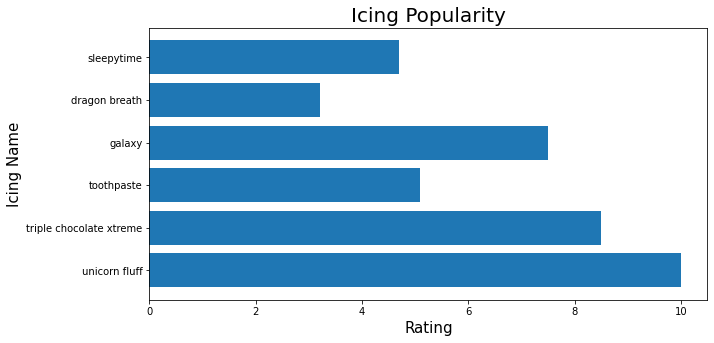

In [12]:
import matplotlib.pyplot as plt

ratings = icing_df['rating']
names = icing_df['name']

plt.figure(figsize=(10, 5))
plt.barh(names, ratings)
plt.title('Icing Popularity', fontsize=20)
plt.ylabel('Icing Name', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.show()

### Etc...

You can also do things like dropping/deleting tables, deleting records, etc. 

# Alternative to Pandas to Explore for Working with Large Datasets in Python

* Dask
* Pyspark
* Koalas
* Vaex
* etc...

Most of these packages provide parallel execution functionality to work with large datasets

To look into these libraries, see : [https://towardsdatascience.com/8-alternatives-to-pandas-for-processing-large-datasets-928fc927b08c](https://towardsdatascience.com/8-alternatives-to-pandas-for-processing-large-datasets-928fc927b08c)